## Initialisation

In [1]:
import sys

if "src" not in sys.path:
    sys.path.insert(0, "src")

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from typing import Set, Dict, List, Tuple
from collections import defaultdict
from joinbench.benchmark_data import BenchmarkData
from joinbench.benchmark_group import BenchmarkGroup
from joinbench.benchmark_plotter import BenchmarkPlotter
from joinbench.evaluation_method_plotter import EvaluationMethodPlotter
from joinbench.benchmark_group_plotter import BenchmarkGroupPlotter
from joinbench.benchmark_group_table_generator import BenchmarkGroupTableGenerator

In [3]:
matplotlib.rcParams.update({
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'figure.figsize': [6, 3.5],
    "figure.autolayout": True,
})

In [4]:
def generate_figure_path(name: str) -> str:
    return f"../report/figures/{name.replace(' ', '-')}.pgf"
def generate_table_path(name: str) -> str:
    return f"../report/tables/{name.replace(' ', '-')}.tex"
def save_df_as_table(df: pd.DataFrame, name: str) -> None:
    path: str = generate_table_path(name)
    df.style.to_latex(path, hrules=True)

## Exploring data

In [5]:
benchmarks: BenchmarkGroup = BenchmarkGroup.load_with_counts([10, 25, 50, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000], path="../data/")
benchmark = benchmarks.get_benchmark_with_count(1000)

In [6]:
names = benchmark.get_report_names_in_order()
names

['join onePercent and onePercent/Product equijoin',
 'join onePercent and onePercent/Comprehension equijoin',
 'join onePercent and onePercent/Indexed equijoin',
 'join onePercent and twentyPercent/Product equijoin',
 'join onePercent and twentyPercent/Comprehension equijoin',
 'join onePercent and twentyPercent/Indexed equijoin',
 'join twentyPercent and onePercent/Product equijoin',
 'join twentyPercent and onePercent/Comprehension equijoin',
 'join twentyPercent and onePercent/Indexed equijoin',
 'join onePercent and fiftyPercent/Product equijoin',
 'join onePercent and fiftyPercent/Comprehension equijoin',
 'join onePercent and fiftyPercent/Indexed equijoin',
 'join evenOnePercent and oddOnePercent/Product equijoin',
 'join evenOnePercent and oddOnePercent/Comprehension equijoin',
 'join evenOnePercent and oddOnePercent/Indexed equijoin']

In [7]:
group_names = benchmark.get_benchmark_group_names()
group_names

{'join evenOnePercent and oddOnePercent',
 'join onePercent and fiftyPercent',
 'join onePercent and onePercent',
 'join onePercent and twentyPercent',
 'join twentyPercent and onePercent'}

In [8]:
group_map = benchmark.map_benchmark_groups_and_benchmark_indices()
group_map

defaultdict(list,
            {'join onePercent and onePercent': [(0, 'Product equijoin'),
              (1, 'Comprehension equijoin'),
              (2, 'Indexed equijoin')],
             'join onePercent and twentyPercent': [(3, 'Product equijoin'),
              (4, 'Comprehension equijoin'),
              (5, 'Indexed equijoin')],
             'join twentyPercent and onePercent': [(6, 'Product equijoin'),
              (7, 'Comprehension equijoin'),
              (8, 'Indexed equijoin')],
             'join onePercent and fiftyPercent': [(9, 'Product equijoin'),
              (10, 'Comprehension equijoin'),
              (11, 'Indexed equijoin')],
             'join evenOnePercent and oddOnePercent': [(12,
               'Product equijoin'),
              (13, 'Comprehension equijoin'),
              (14, 'Indexed equijoin')]})

In [9]:
benchmark.get_benchmark_mean_from_index(0)

0.01741151652775584

### Basic graphs

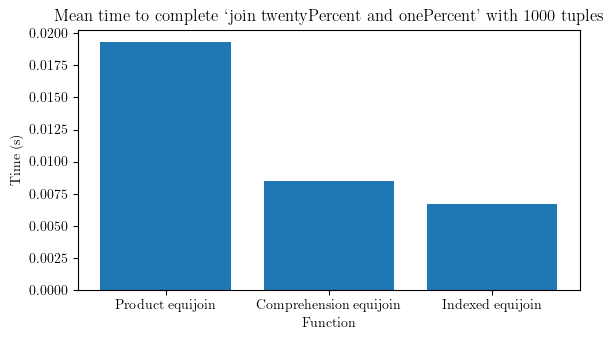

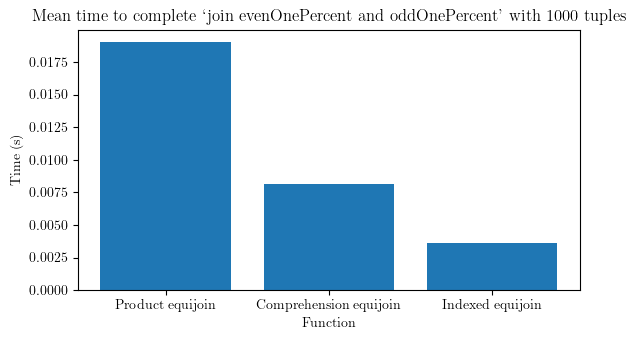

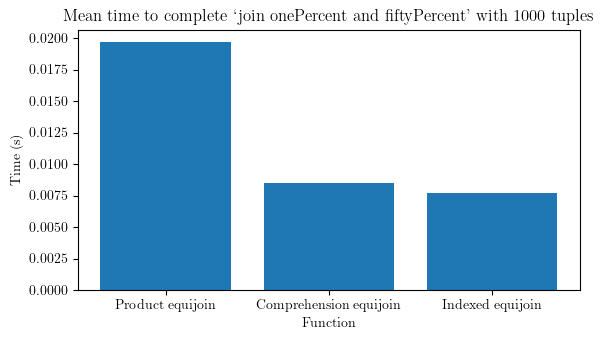

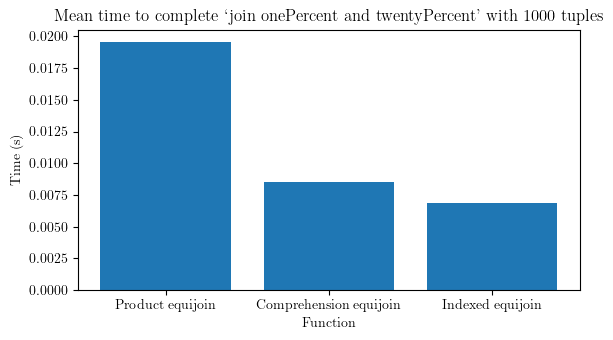

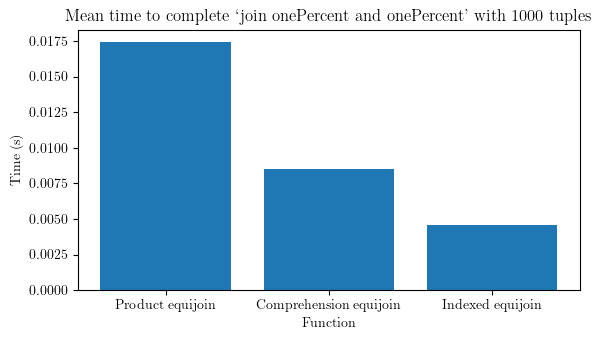

In [10]:
plotter = BenchmarkPlotter(benchmark)
for group_name in group_names:
    fig, ax = plt.subplots()
    plotter.plot_benchmark_group_means(ax, group_name)
    plt.savefig(generate_figure_path(f"{group_name}-{benchmark.get_tuple_count()}"))
plt.show()

In [11]:
benchmark.get_benchmark_mean('join onePercent and onePercent', 'Product equijoin')

0.01741151652775584

In [12]:
print(benchmark.get_benchmark_mean('join onePercent and twentyPercent', 'Comprehension equijoin'))
print(benchmark.get_benchmark_mean('join twentyPercent and onePercent', 'Comprehension equijoin'))

0.008504242831562014
0.008500079559409844


## Teseting evaluation form

In [13]:
EVAL_TEST_COUNT = 1000
nf = benchmarks.get_benchmark_with_count(EVAL_TEST_COUNT)
whnf = BenchmarkData.load_with_count(EVAL_TEST_COUNT, path="../data/whnf/")

In [14]:
whnf_plotter = BenchmarkPlotter(whnf)
# whnf_plotter.plot_benchmark_group_means(ax, g

In [15]:
bg = list(whnf.get_benchmark_group_names())[0]
bg

'join twentyPercent and onePercent'

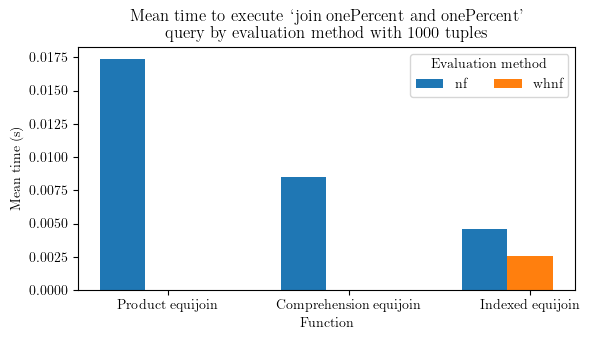

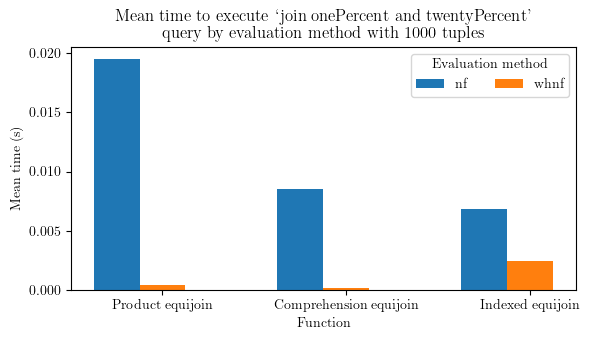

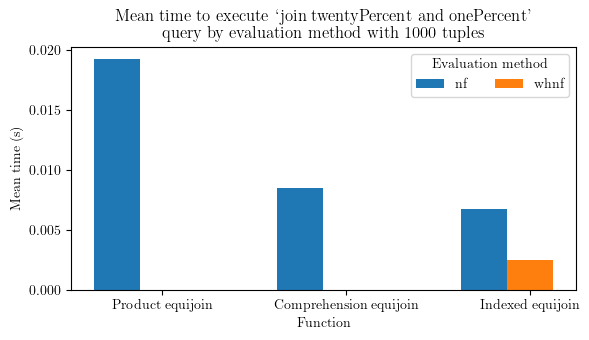

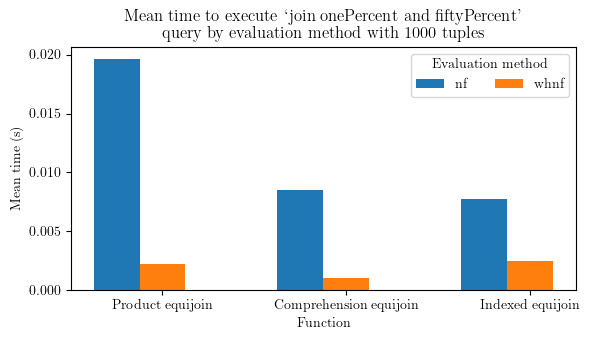

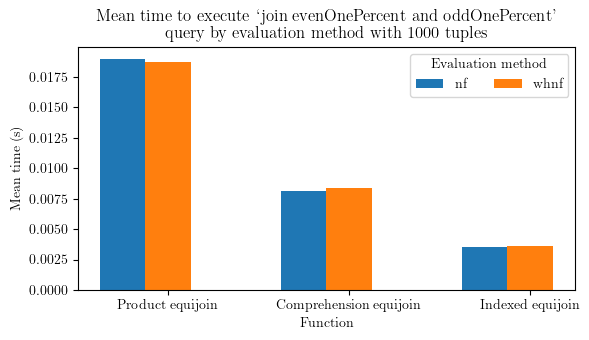

In [16]:
emp = EvaluationMethodPlotter(nf, whnf)

for query in nf.get_query_list():
    fig, ax = plt.subplots()
    emp.plot_benchmark_group_means_comparison(ax, query)
    plt.savefig(generate_figure_path(f"eval-method-{query} {EVAL_TEST_COUNT}"))
    plt.show()

## Testing difference with tuple count

In [17]:
xs = benchmarks.get_tuple_counts()
xs

[10,
 25,
 50,
 100,
 250,
 500,
 750,
 1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000]

In [18]:
benchmark.get_function_name_list()

['Product equijoin', 'Comprehension equijoin', 'Indexed equijoin']

### No inset

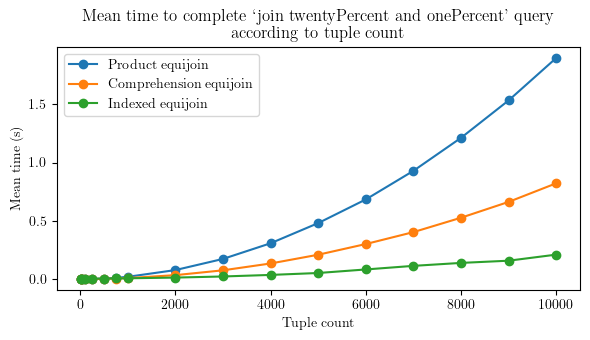

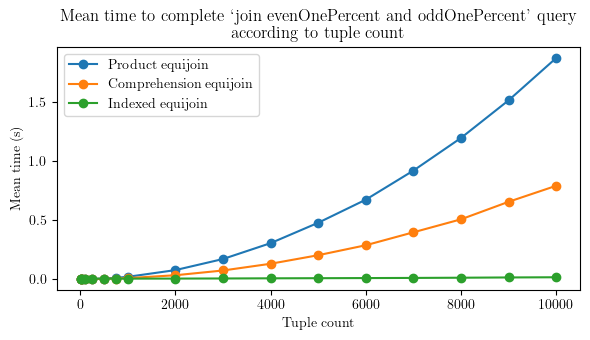

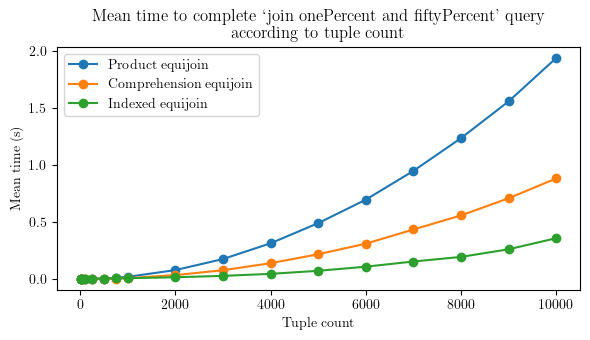

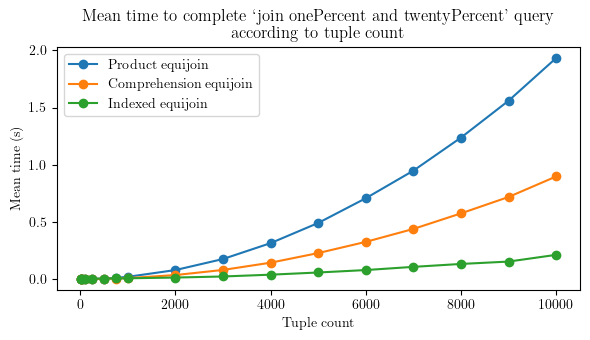

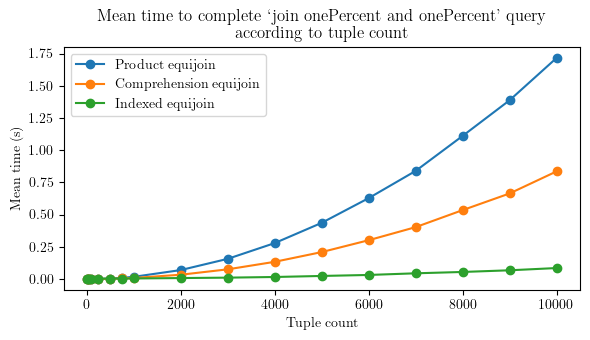

In [19]:
group_plotter: BenchmarkGroupPlotter = BenchmarkGroupPlotter(benchmarks)

groups = benchmark.get_benchmark_group_names()

for group in groups:
    fig, ax = plt.subplots()
    group_plotter.plot_mean_time_of_group_by_tuple_count(ax, group)
    plt.savefig(generate_figure_path(f"{group}-by-tuples"))

## Test with different counts

### Only small counts

In [20]:
NUM_COUNT: int = 8
lesser_counts = sorted(benchmarks.get_tuple_counts())[:NUM_COUNT]
lesser_counts_group: BenchmarkGroup = benchmarks.make_subgroup_with_counts(lesser_counts)
lesser_counts_plotter: BenchmarkGroupPlotter = BenchmarkGroupPlotter(lesser_counts_group)

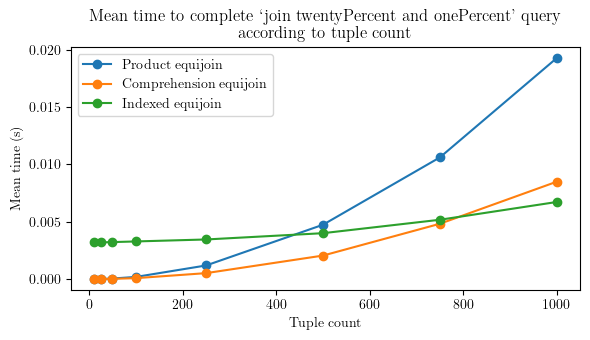

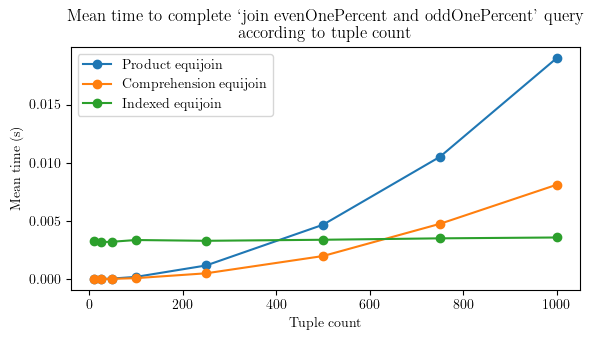

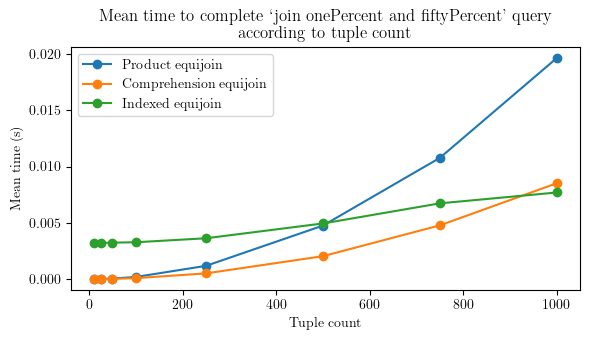

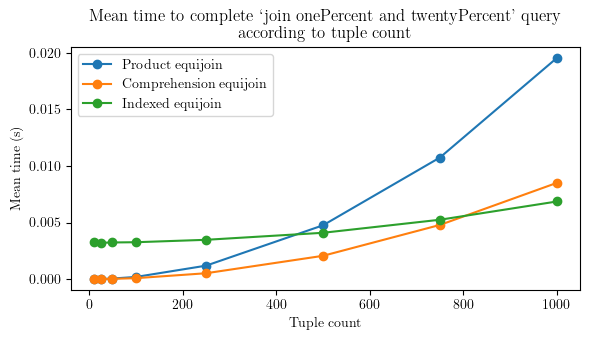

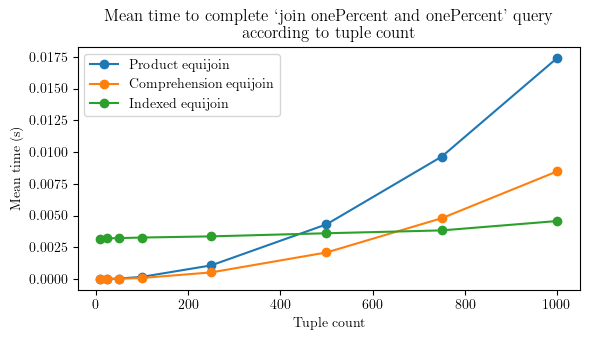

In [21]:
for group in groups:
    fig, ax = plt.subplots()
    lesser_counts_plotter.plot_mean_time_of_group_by_tuple_count(ax, group)
    plt.savefig(generate_figure_path(f"{group_name}-by-tuple-smallest"))

### Inset

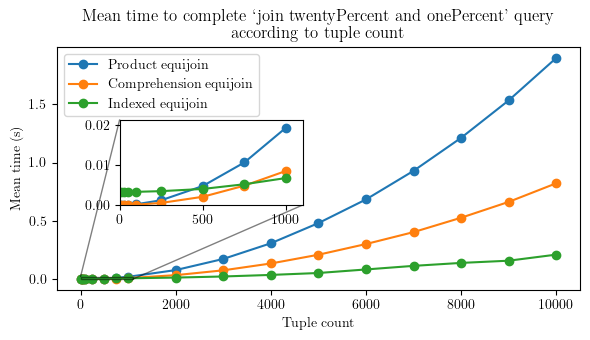

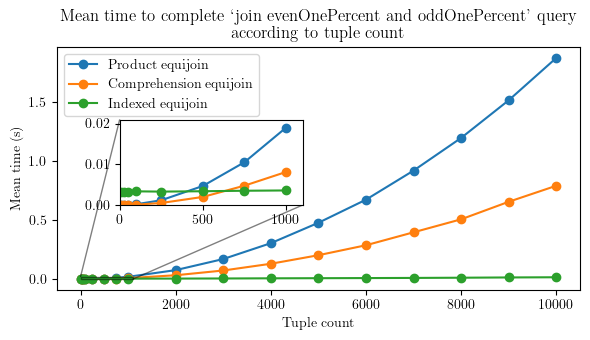

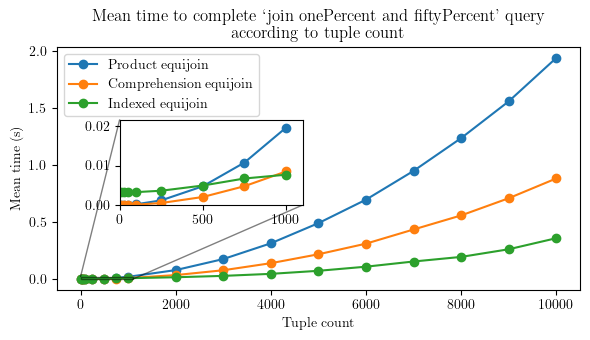

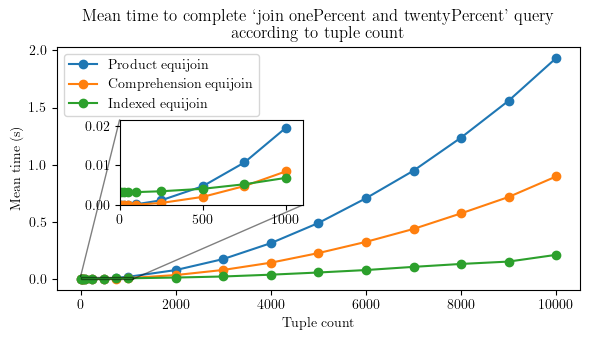

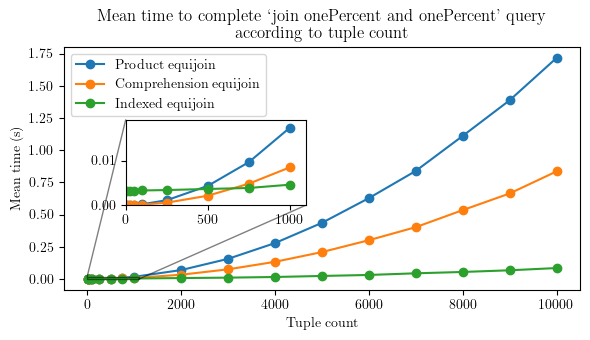

In [22]:
inset_axes_dimensions: List[float] = [0.12, 0.35, 0.35, 0.35]
for group in groups:
    fix, ax = plt.subplots()
    group_plotter.plot_mean_time_of_group_by_tuple_count_with_inset_axes(ax, group, NUM_COUNT, inset_axes_dimensions, 1.1)
    plt.savefig(generate_figure_path(f"{group}-by-tuple-with-inset"))

## Creating graphs for report

### Showing all groups for a benchmark

In [23]:
functions = benchmark.get_function_name_list()
functions

['Product equijoin', 'Comprehension equijoin', 'Indexed equijoin']

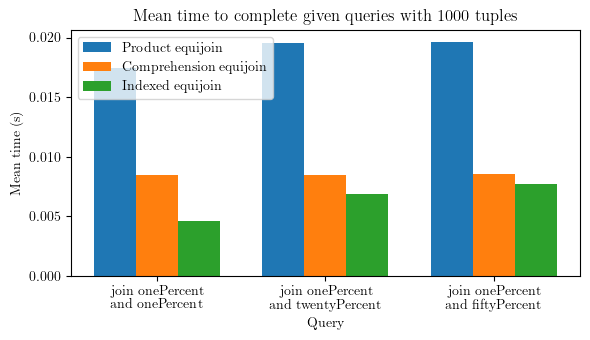

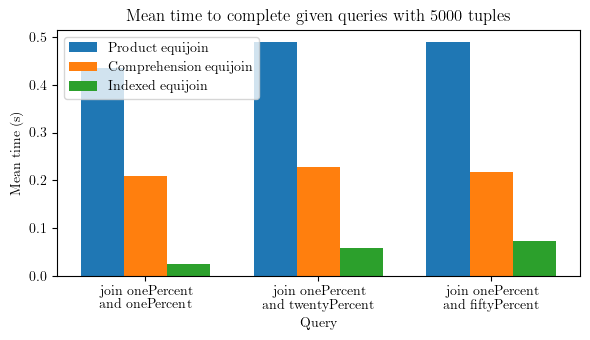

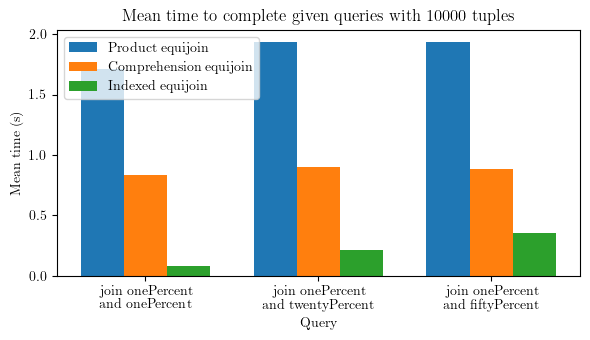

In [24]:
queries_to_display = ["join onePercent \nand onePercent", "join onePercent \nand twentyPercent", "join onePercent \nand fiftyPercent"]

counts: List[int] = [1000, 5000, 10000]

for benchmark in benchmarks.get_list_of_benchmarks_with_counts(counts):
    benchmark_plotter: BenchmarkPlotter = BenchmarkPlotter(benchmark)
    fig, ax = plt.subplots()
    benchmark_plotter.plot_given_queries(ax, queries_to_display)
    plt.savefig(generate_figure_path(f"onePercent joins with {benchmark.get_tuple_count()} tuples"))
    


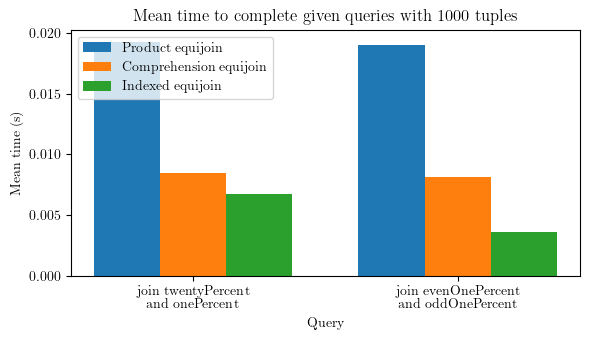

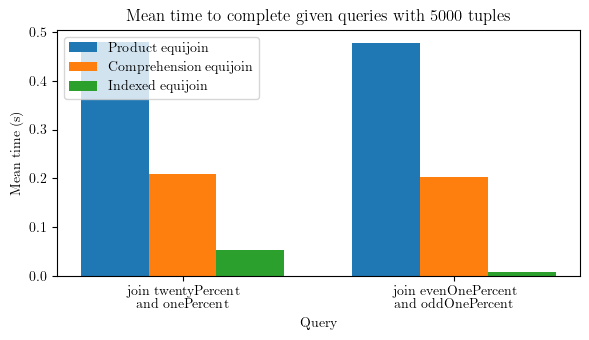

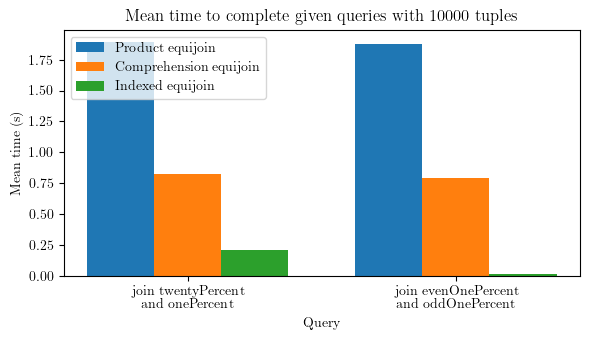

In [25]:
non_standard_queries: List[str] = ['join twentyPercent \nand onePercent', 'join evenOnePercent \nand oddOnePercent']

for benchmark in benchmarks.get_list_of_benchmarks_with_counts(counts):
    benchmark_plotter: BenchmarkPlotter = BenchmarkPlotter(benchmark)
    fix, ax = plt.subplots()
    benchmark_plotter.plot_given_queries(ax, non_standard_queries)
    plt.savefig(generate_figure_path(f"non standard query with {benchmark.get_tuple_count()} tuples"))

### Generating data

In [26]:
query: str = 'join onePercent and onePercent'

group_table_gen: BenchmarkGroupTableGenerator = BenchmarkGroupTableGenerator(benchmarks)
percentage_change_of_means: pd.DataFrame = group_table_gen.get_percentage_change_of_indexed_equijoin_for_counts(counts, query)
save_df_as_table(percentage_change_of_means, f"percentage change of means {query}")

In [27]:
non_standard_query_mean_change_even_odd: pd.DataFrame = group_table_gen.get_percentage_change_of_indexed_equijoin_for_counts(counts, 'join evenOnePercent and oddOnePercent')
non_standard_query_mean_change_twenty_one: pd.DataFrame = group_table_gen.get_percentage_change_of_indexed_equijoin_for_counts(counts, 'join twentyPercent and onePercent')

print(non_standard_query_mean_change_even_odd)
print(non_standard_query_mean_change_twenty_one)

save_df_as_table(non_standard_query_mean_change_even_odd, "percentage change of means join evenOnePercent and oddOnePercent")
save_df_as_table(non_standard_query_mean_change_twenty_one, "percentage change of means join twentyPercent and onePercent")

                       1000 tuples 5000 tuples 10000 tuples
Product equijoin           -81.2\%     -98.4\%      -99.2\%
Comprehension equijoin     -55.9\%     -96.3\%      -98.1\%
                       1000 tuples 5000 tuples 10000 tuples
Product equijoin           -65.1\%     -89.2\%      -88.9\%
Comprehension equijoin     -20.8\%     -75.1\%      -74.5\%


## Comparing twentyPercent ones

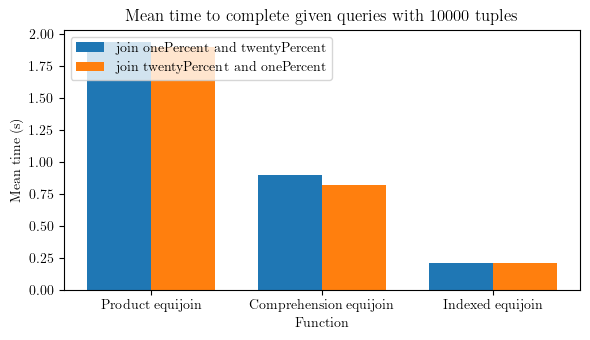

In [28]:
benchmark: BenchmarkData = benchmarks.get_benchmark_with_count(10000)
benchmark_plotter = BenchmarkPlotter(benchmark)

fig, ax = plt.subplots()
benchmark_plotter.compare_query_means(ax, ['join onePercent and twentyPercent', 'join twentyPercent and onePercent'])
plt.savefig(generate_figure_path(f"join onePercent and twentyPercent flipped {benchmark.get_tuple_count()} tuples"))

#### Percentage change of onePercent and twentyPercent
onePercent and twentyPercent is seen as the original

In [29]:
for benchmark in [benchmarks.get_benchmark_with_count(x) for x in [5000, 6000, 7000, 8000, 9000, 10000]]:
    print(benchmark.get_tuple_count())
    for function in benchmark.get_function_name_list():
        b1 = benchmark.get_benchmark_mean('join onePercent and twentyPercent', function)
        b2 = benchmark.get_benchmark_mean('join twentyPercent and onePercent', function)
        percentage_change: float = BenchmarkGroupTableGenerator.calculate_percentage_change(b1, b2)
        print(f"{function}: {percentage_change}")
    print("\n", end="")

5000
Product equijoin: -2.1265933526090643
Comprehension equijoin: -8.134548490954332
Indexed equijoin: -9.453255292173719

6000
Product equijoin: -3.3663296496121218
Comprehension equijoin: -7.64864273417113
Indexed equijoin: 4.580030772881654

7000
Product equijoin: -2.086186336592449
Comprehension equijoin: -8.124493557655315
Indexed equijoin: 6.064389906699446

8000
Product equijoin: -2.078752273004066
Comprehension equijoin: -8.41655619957358
Indexed equijoin: 4.8245389304403705

9000
Product equijoin: -1.7493835426188775
Comprehension equijoin: -7.804908172142532
Indexed equijoin: 2.9927871594708217

10000
Product equijoin: -1.905729033920625
Comprehension equijoin: -8.451301690451631
Indexed equijoin: -1.118707710696526



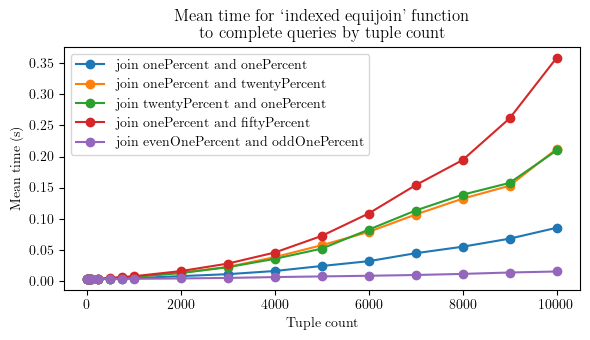

In [30]:
function: str = 'Indexed equijoin'
fig, ax = plt.subplots()
group_plotter.plot_mean_time_by_tuples_for_function(ax, function)
plt.savefig(generate_figure_path(f"{function.lower()} query comparison"))

## Evaluation

Product equijoin: [7.66006830014449e-09, 1.574660964790946e-08, 5.2605879079307595e-08, 3.739014122226399e-07, 1.739558755866061e-06, 2.9140046525277194e-05, 3.5492370450099814e-05, 7.137270358860496e-05, 1.8206116306967283e-05, 0.000110253509075532, 6.809259183295776e-05, 4.542652504305309e-05, 7.717660249851205e-05, 0.00017551019288555072, 0.002105397041810383, 0.0002679863972530137, 0.0025023655437832392]
Comprehension equijoin: [3.57840966054009e-09, 1.515775281293449e-08, 5.812079425034339e-08, 1.400138774489602e-07, 4.879834167049901e-06, 2.097622217799097e-05, 3.6266954005616605e-05, 7.504590606533899e-06, 4.687864446816442e-06, 2.3234473373235292e-05, 1.0727475469446312e-05, 7.655319868283086e-05, 0.0005973244600723006, 0.0006803839603364828, 0.0001227856778279768, 2.6781905223516642e-05, 0.0001433064949706228]
Indexed equijoin: [3.6632026318168406e-05, 2.0993331089026262e-05, 1.4213613239760891e-05, 1.8604999331976552e-05, 2.1119632884657434e-05, 2.6879749123146454e-05, 3.8440

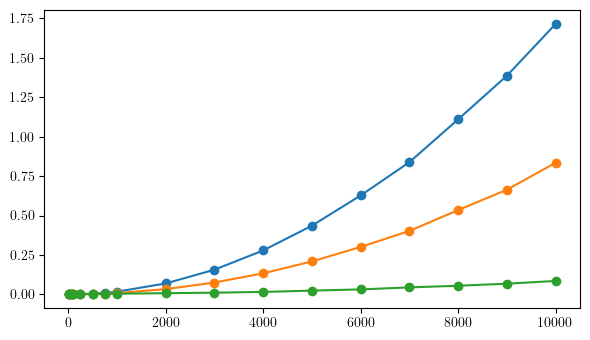

Product equijoin: [1.5634478727837372e-09, 1.711324286423561e-08, 3.64737781306127e-08, 1.6350140879591297e-07, 8.127110692701321e-07, 3.4930590291807384e-05, 6.832423822449149e-05, 0.00014914526941519992, 0.0001336854702146695, 0.0004079527532374491, 0.0003406361913571853, 0.0007297181230940921, 0.00038871452598177394, 0.0009277439778482607, 0.0007111875640156974, 0.0001443332303482135, 0.0027617047668192234]
Comprehension equijoin: [1.7945812078169852e-09, 5.0004174487108834e-08, 1.881160733001664e-08, 1.461987951609098e-07, 1.2841891837647119e-06, 1.096628736678281e-06, 1.88286196941971e-05, 1.0353110245122561e-05, 0.0005239075446026696, 0.0007794490250921097, 0.0004923140678058992, 0.0007914092927882763, 0.001618663931822294, 0.0043116540564807895, 0.002246709269830732, 0.0019569450274651502, 0.007723078247982647]
Indexed equijoin: [1.915622505129543e-05, 4.3046378705237316e-05, 1.91995665144122e-05, 2.2007438315977915e-05, 4.2624915878054845e-05, 3.3800421092729664e-05, 5.56796441

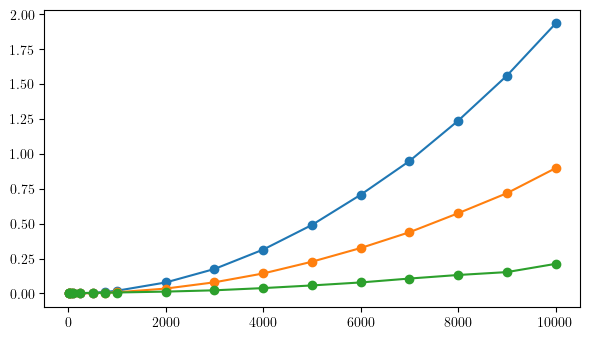

Product equijoin: [3.4748264903551942e-09, 1.7358926920239262e-08, 7.98143039550911e-08, 3.5460730187819177e-07, 4.732195508540739e-06, 3.452896478097646e-05, 6.40248852794159e-06, 2.4916775663093905e-05, 7.033249877271384e-05, 0.0004950301449973391, 0.0006034520430847381, 0.001014258405773604, 0.00216722888516578, 0.0001642064027709338, 4.9308274583723024e-05, 0.0015442553306238111, 0.000673010242173939]
Comprehension equijoin: [1.8834402146469693e-09, 7.856382296913445e-09, 3.6491050134670154e-08, 4.703619574955728e-07, 1.286914481606895e-06, 8.046126338045322e-06, 3.076902214906044e-05, 3.5528593698672e-06, 1.7689918685361233e-05, 0.0001674979912343081, 9.960541707629239e-05, 0.0003272321164212924, 0.0001526969476612479, 0.00011392051535937611, 0.00029154638292811923, 4.845064307546205e-05, 6.0856507540550875e-05]
Indexed equijoin: [1.7410006914755302e-05, 2.1404457700967293e-05, 1.9313664051279482e-05, 1.7211248051227113e-05, 1.5008966587238783e-05, 3.6977201960467564e-05, 9.049404

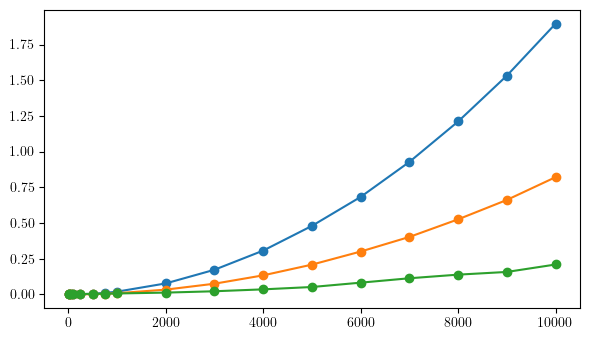

Product equijoin: [3.0612771748226503e-09, 2.8488357563460324e-08, 3.864451857584649e-08, 3.5082205953422767e-07, 2.80255544773053e-06, 2.281576397835118e-05, 4.969038769112026e-05, 4.09132554430141e-05, 0.00019697071161737793, 0.0005078027658257292, 0.0003888342483422432, 0.0002075108260254916, 0.0008381611534895234, 0.0005477306338371623, 0.00023969376584538014, 0.0012255773943035011, 0.0010101005369098312]
Comprehension equijoin: [2.117609630857394e-09, 6.665101045807652e-09, 4.321804166138817e-08, 8.265018957175607e-07, 1.909224073409191e-06, 1.186103661588118e-05, 4.3526966612878006e-05, 4.380247362594284e-06, 0.00030775514869837213, 0.0007597513114124942, 0.001626123302379769, 0.0023284943585442203, 0.002498333306511097, 0.00464761495110012, 0.007977815330066865, 0.009248439409214958, 0.002561880652901367]
Indexed equijoin: [2.007731915312835e-05, 3.3441746749361634e-05, 2.6288114201981943e-05, 3.284865305918114e-05, 2.1147600644785414e-05, 4.999625240639191e-05, 6.04910070523627

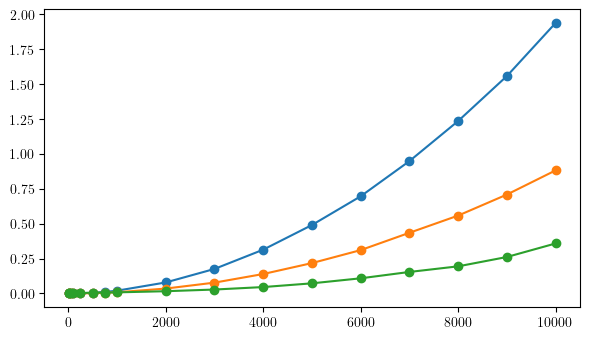

Product equijoin: [9.254574108763766e-09, 7.661546382475418e-09, 7.96508539052244e-08, 3.410078859660619e-07, 1.120858843776789e-06, 2.142485390338201e-06, 4.673487223850492e-05, 1.7094062429288904e-05, 0.00021865572458227282, 0.0006179116089543481, 0.00030045467264563913, 8.972135757980396e-05, 9.373792662195309e-05, 0.001426671036579547, 0.0002826976305301482, 0.00016094326360830422, 0.0001805975231837063]
Comprehension equijoin: [1.937502472508881e-09, 4.3110060208123224e-09, 1.028633643719063e-07, 1.744915140067654e-07, 4.128835423075842e-06, 1.0839370280182271e-05, 7.813032516396329e-06, 2.2237374704155753e-06, 9.74592505283908e-06, 3.2174287321441e-05, 0.001450574732319961, 3.308496340682131e-05, 0.0007436327543847333, 8.671155146998311e-05, 0.00010253294486360721, 4.4078512728806224e-05, 0.0007972694739958692]
Indexed equijoin: [1.9484096802379133e-05, 1.694109038573471e-05, 2.245947059642553e-05, 0.0001442861550687442, 1.900816705692446e-05, 2.5316664762588122e-05, 3.5759288565

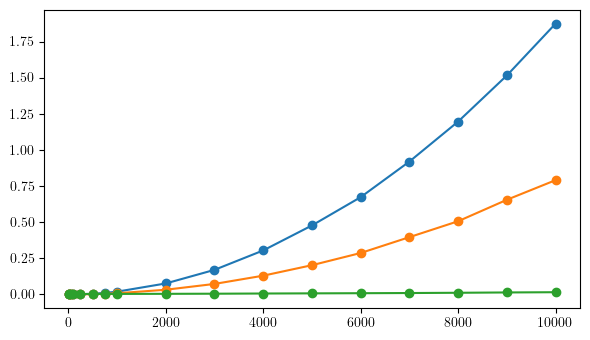

In [31]:
for query in benchmarks.get_query_list():
    fig, ax = plt.subplots()
    group_plotter.plot_mean_time_by_tuples_with_standard_deviation_for_query(ax, query)
    for function in benchmarks.get_function_name_list():
        print(f"{function}: {benchmarks.get_standard_deviations(query, function)}")
    plt.show()

In [32]:
comp_queries: List[str] = ["join onePercent and onePercent", "join onePercent and fiftyPercent", "join evenOnePercent and oddOnePercent"]
for query in comp_queries:
    counts: List[str] = [1000, 5000, 10000]
    std_pd = group_table_gen.get_mean_and_std_dev_for_query_and_counts(query, counts)
    save_df_as_table(std_pd, f"std dev comparison {query}")